## I. Learning algorithm

The solution is a relatively simple implementation of Deep Deterministic Policy Gradients (DDPG) Actor-Critic algorythm.
As the name suggests, the solution consists of two networks - Actor (the network that chooses the **action**) and Critic (the network **decides** whether the action was successful).

Due to the fact that the dimension of feature space is relatively small (33), for the solution we will have enough simple fully connected networks.

Actor network have 33 inputs (for number for dimensions), and Critic have 37 inputs (number of dimensions + number of actions).
First hidden layer of both networks have 256 outputs, and second layer have 128 outputs. To have some nonlinearity all hidden layers have ReLU activation function. Actor network have 4 outputs (for number of actions) with tanh activation function (so that the probability of one action does not become too big), and Critic have 1 output - aproximation of Q value for the state-action pair.

The following measures have been taken to improve convergence:

1. We have two copies of each network. Initially they are the same. In the process, we train locale networks by using target networks. At the same time, the target network itself is changing very slowly (although it tends to local). It helps to  prevent instabilities in learning.
1. We initialize initial weight of networks as described [here](https://arxiv.org/abs/1509.02971)
1. For balance exploration-exploitation tradeoff, during training we have 1% chance to add some normal \[0;0.1\] noice to our actions

The Adam optimizer are usual first-option optimizer, as usual works quite good in our case. Optimal learinig rate for out networks are something around 0.0001

## II. Plot of Rewards

In [1]:
import pickle as pkl
with open('stat.pk','rb') as f:
    stat=pkl.load(file=f)

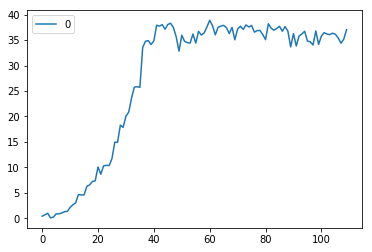

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame([x[1] for x in stat]).plot()
plt.show()

Environment solved in 110 episodes

## III. Solution example

In [4]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name='c:/Reacher_20/Reacher.exe');

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
from network import Actor
actor = Actor(33,4,1)

In [6]:
import torch
actor.load_state_dict(torch.load('solved.actor.pth'))

In [7]:
brain_name=env.brain_names[0]
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
score = np.zeros(20)
while True:
    action = actor(torch.tensor(state,dtype=torch.float32)).detach().numpy()
    action = np.clip(action, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(action)[brain_name] 
    next_state = env_info.vector_observations         # get next state (for each agent)
    score += env_info.rewards
    done = env_info.local_done                        # see if episode finished
    state = next_state # roll over states to next time step
    if np.any(done):
        break

In [8]:
print("Mean score {}".format(np.mean(score)))

Mean score 35.950999196432534


In [9]:
env.close()

## IV. Ideas for future work

Try some other hyperparameters, initialization methods, noise algorythms, etc